# Testing The Efficient Market Theory

### Introduction
    
The purpose for this project is to better understand what it is that drives the valuation for technology stocks. Over the last 20 years we have seen a boom in the usage and value of technologies across sectors. This begs the question are these technology stocks all over-valued or does the efficient market theory hold true, meaning that the market is all knowing and takes into account every piece of information public and private. 

Where I see that theory failing is logically and in financial data. Logically the efficient market theory fails in my opinion becuase the market system was built by humans and humans are not all knowing and cannot possibly build something that is. Also human error is something that has been shown over in many different times of human evolution. Financial data has also shown to prove the efficient market theory inaccurate. One example is the IPO of Zoom Video Communications (ZM) and the existing stock Zoom Technologies Inc. (ZTNO). There was confusion amongst investor and a stock with no operation stock price increase 1000s of percentage points in a very short amount of time. 

I want to find and test these situations and help prove that the market can misprice and be inaccurate. This can come from several places: stock price data, macroeconomic events, financial statements, media presence, ratios, etc. 

In my project I will cover: comparisons between stock price data and macroeconomic events, financial statements, a companies media presence, statistics, and the ratios and metrics that I can get. I will gather data from the following sources: https://fred.stlouisfed.org/, https://finance.yahoo.com/, https://koyfin.com/, https://ycharts.com/, "Efficient Capital Markets: A Review of Theory and Empirical Work", "Rational Expectations and the Theory of Price Movements", and more sources as I find them necessary to my research. 

# Vizualizations

For this project I will need plenty of vizualizations that show either the efficient market theory holding true and that show when the efficient market theory being untrue. This will come in the form of normalized data coming both from Fred and from Yahoo Finance. These comparisons will make it so you can clearly see what I am describing in my work.  

In [1]:
import pandas_datareader as web
from datlib.FRED import *
from datlib.plots import *
from datlib.stats import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start = datetime.datetime(2000,1,1)
end = datetime.datetime.today()
freq = "Q"
data_codes = {"Nonfarm Payroll": 'PAYEMS',
             "CPI": 'CPIAUCSL',
             "VIX": "VIXCLS",
             "10 Year Treasury Yield": "DGS10",
             "Money Supply": "WM2NS",
             "3 Month LIBOR Rate": "USD3MTD156N",
             "Federal Debt as a Percent of GDP": "GFDEGDQ188S",
             "GDP": "GDP"}

data = gather_data(data_codes = data_codes, start = start, 
                   end = end, freq = freq)
bil_to_mil_list  = ["GDP", 
                    "Money Supply"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [3]:
data

,Nonfarm Payroll,CPI,VIX,10 Year Treasury Yield,Money Supply,3 Month LIBOR Rate,Federal Debt as a Percent of GDP,GDP
DATE,,,,,,,,
2000-03-31,131241.666667,170.100000,23.150317,6.468413,4.691654e+06,6.115781,57.72134,10002179.0
2000-06-30,132018.000000,171.433333,24.923968,6.184921,4.765777e+06,6.637152,55.48491,10247720.0
2000-09-30,132273.000000,173.000000,19.169048,5.889841,4.802046e+06,6.699063,54.99213,10318165.0
2000-12-31,132538.666667,174.233333,26.016667,5.570645,4.886469e+06,6.698721,54.25790,10435744.0
2001-03-31,132744.666667,175.900000,25.726452,5.044194,5.020154e+06,5.336416,55.14434,10470231.0
...,...,...,...,...,...,...,...,...
2020-09-30,140860.000000,259.421333,25.808906,0.650625,1.839013e+07,0.252802,127.47024,21138574.0
2020-12-31,142619.000000,260.983000,25.621719,0.864516,1.897942e+07,0.224717,129.19415,21477597.0
2021-03-31,143355.000000,263.395000,23.202459,1.335902,1.963911e+07,0.200431,127.65351,22038226.0


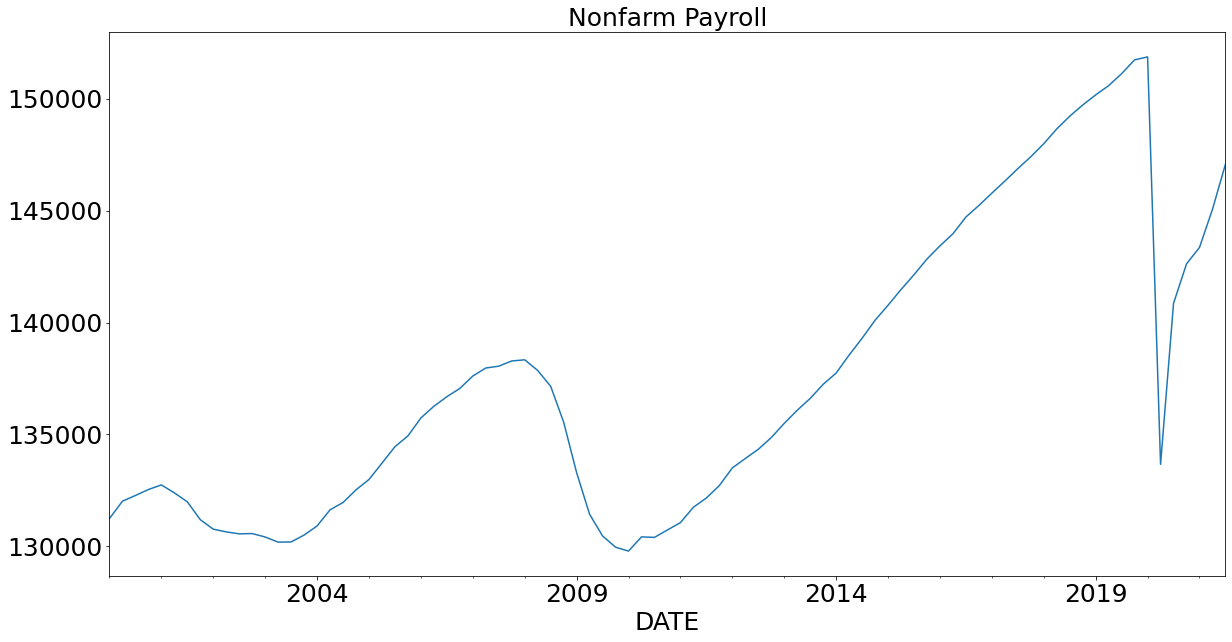

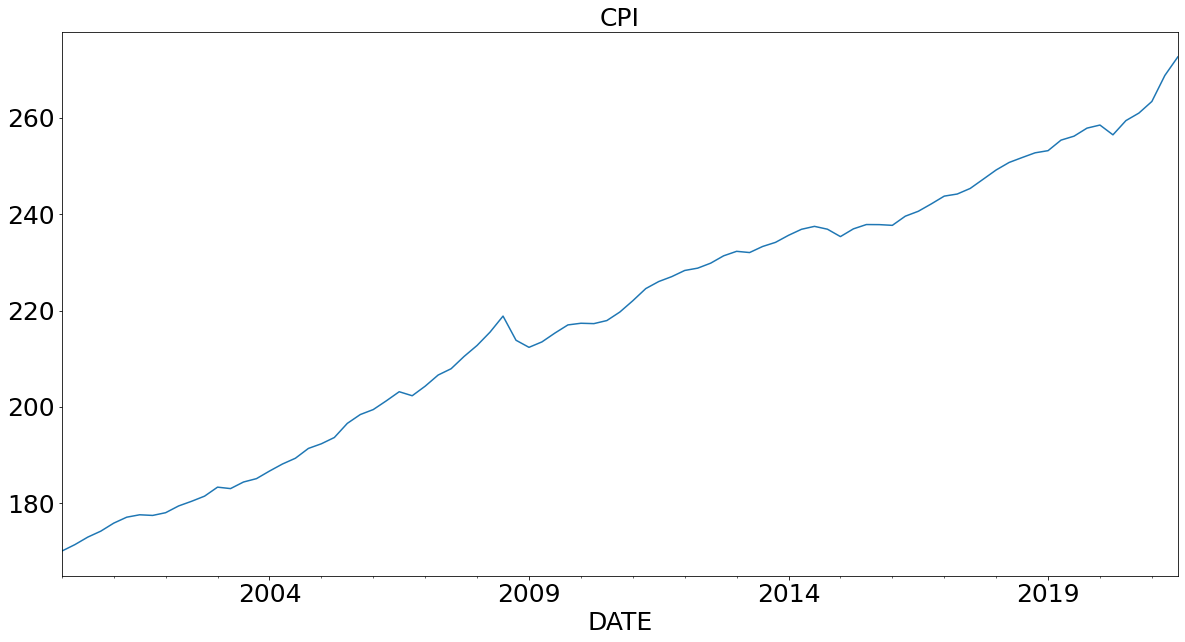

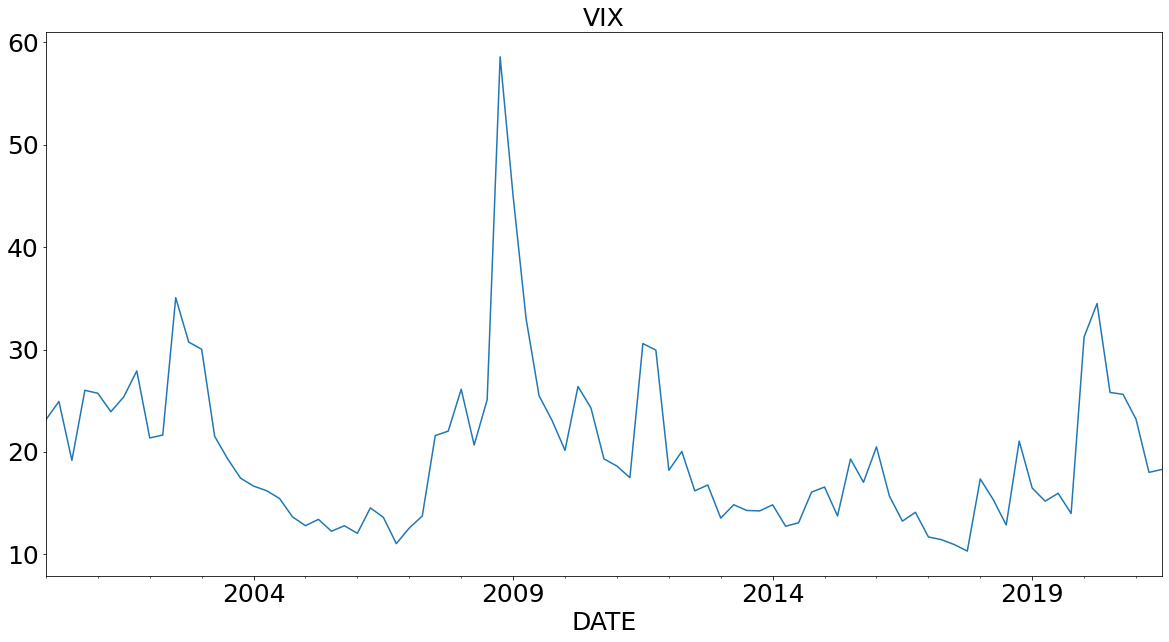

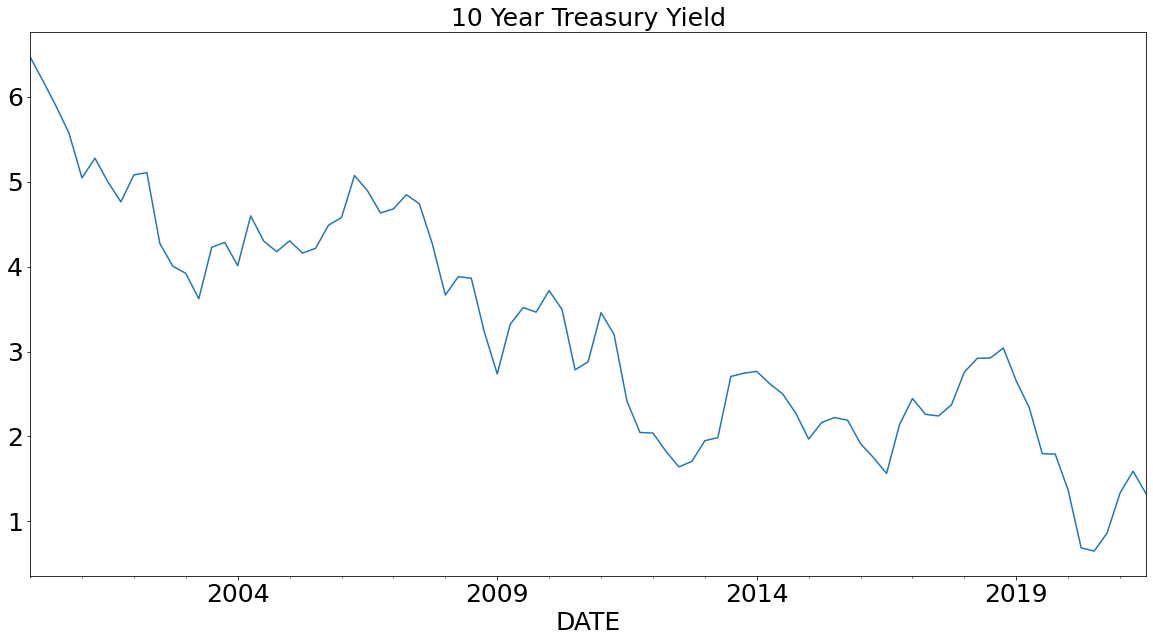

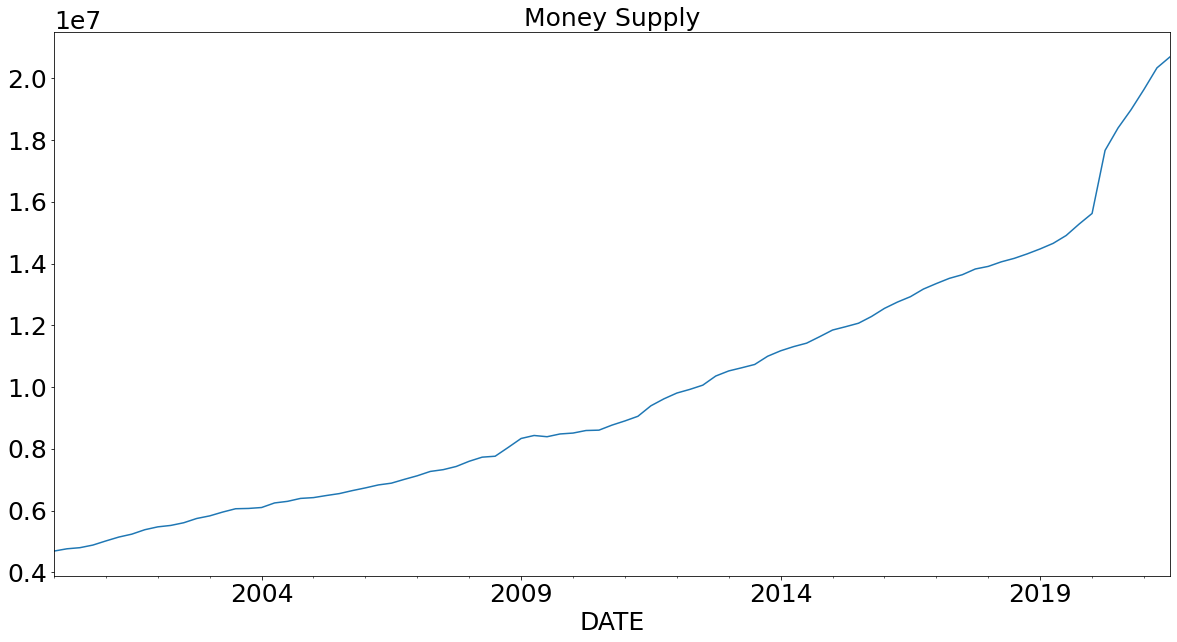

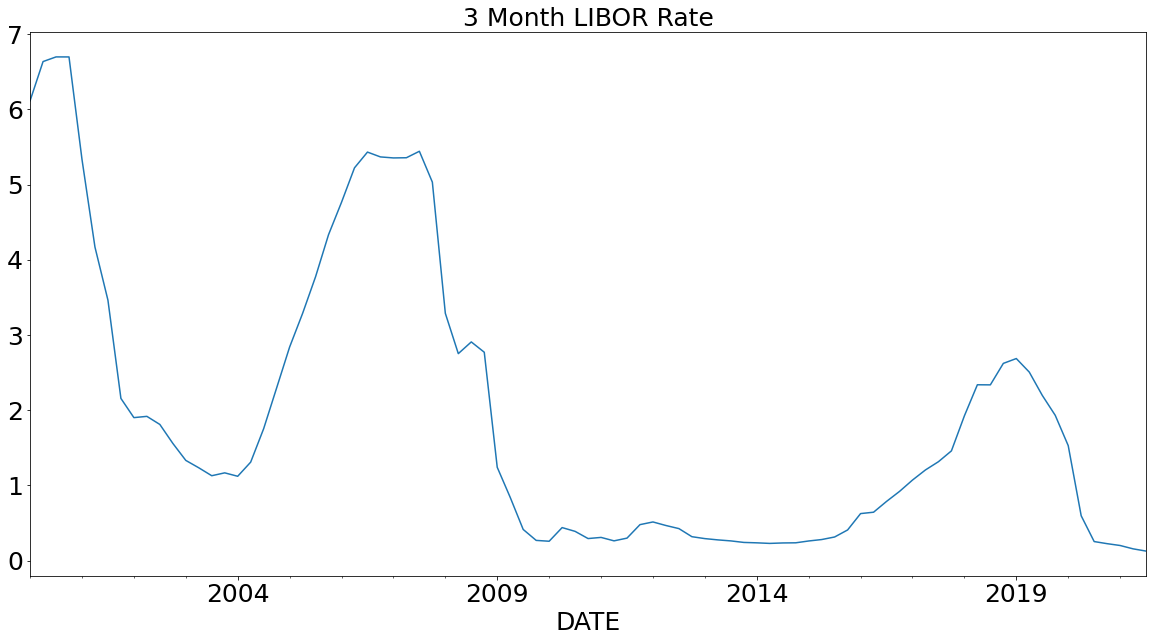

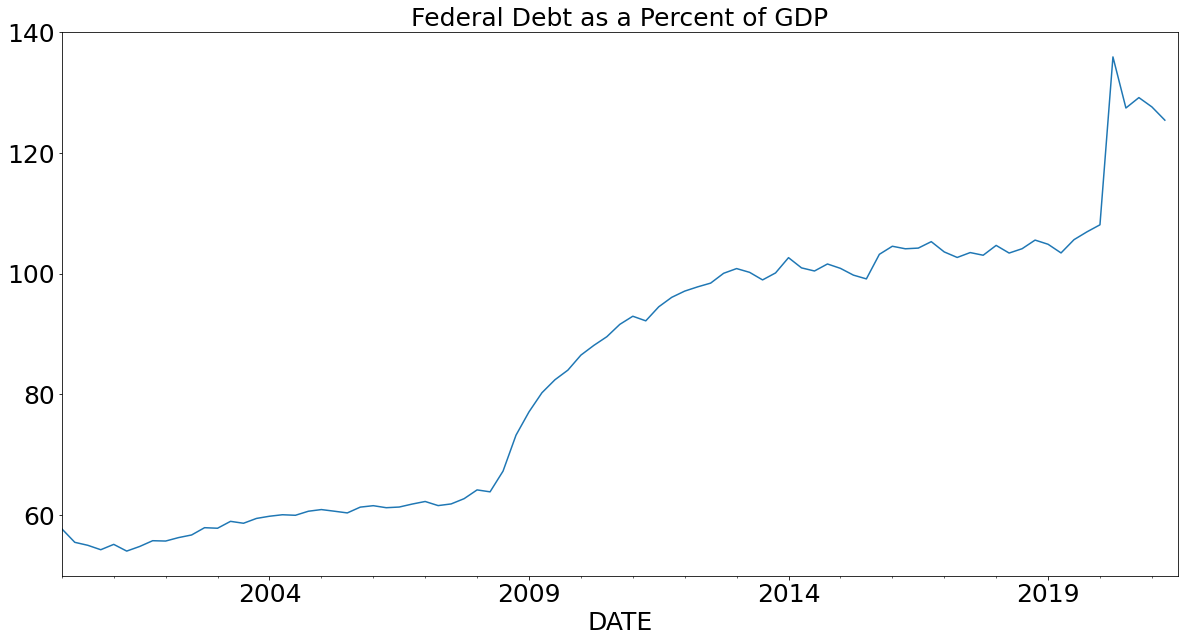

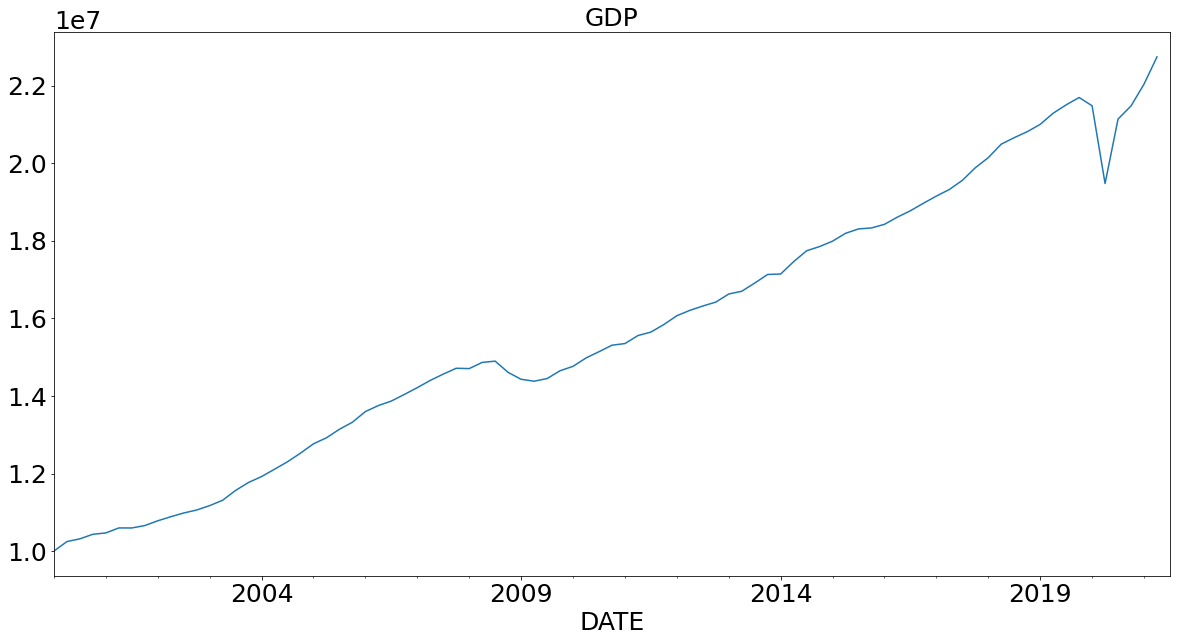

In [4]:
plt.rcParams['font.size'] = 25
for key in data: 
    fig, ax = plt.subplots(figsize = (20,10))
    data[key].plot.line(color = "C0", ax = ax)
    plt.title(key, fontsize = 25,)
    plt.show()
    plt.close()

[*********************100%***********************]  5 of 5 completed


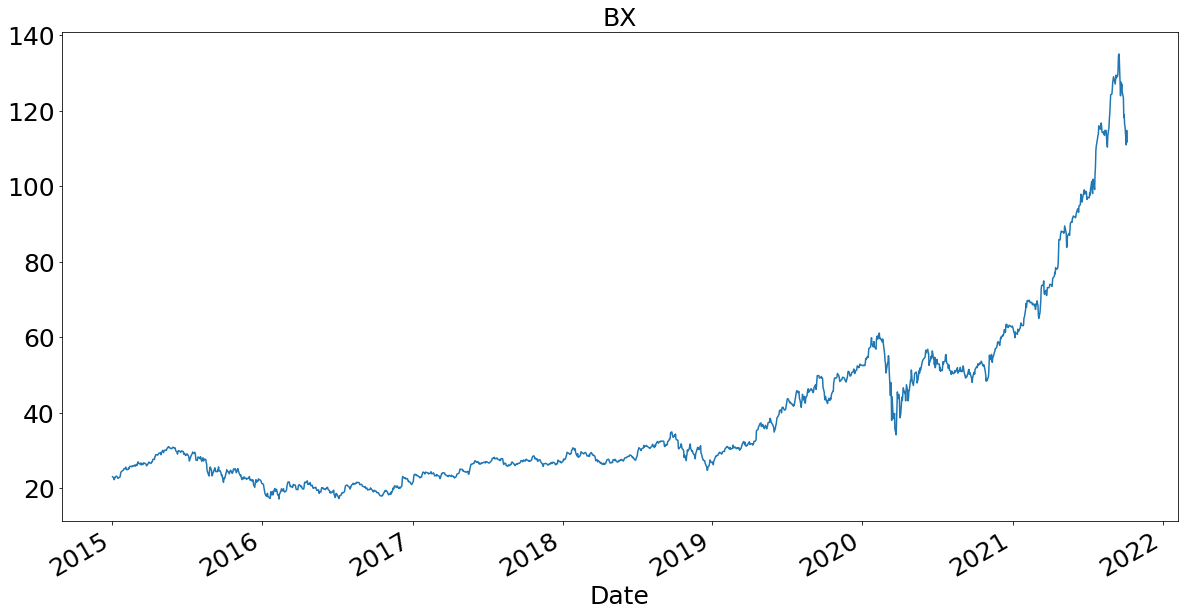

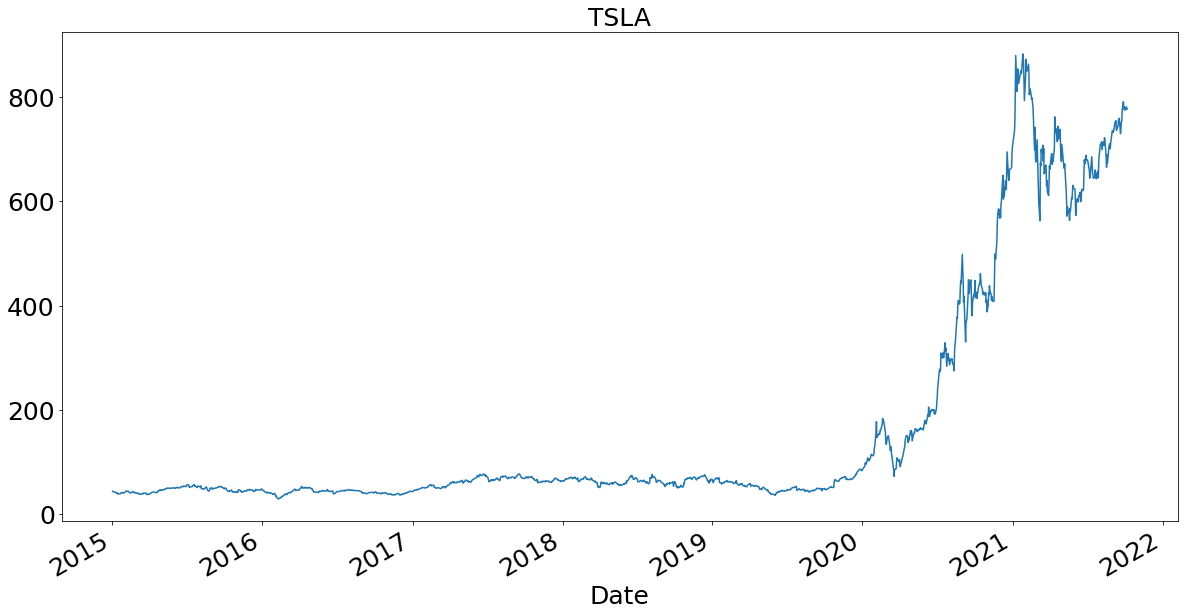

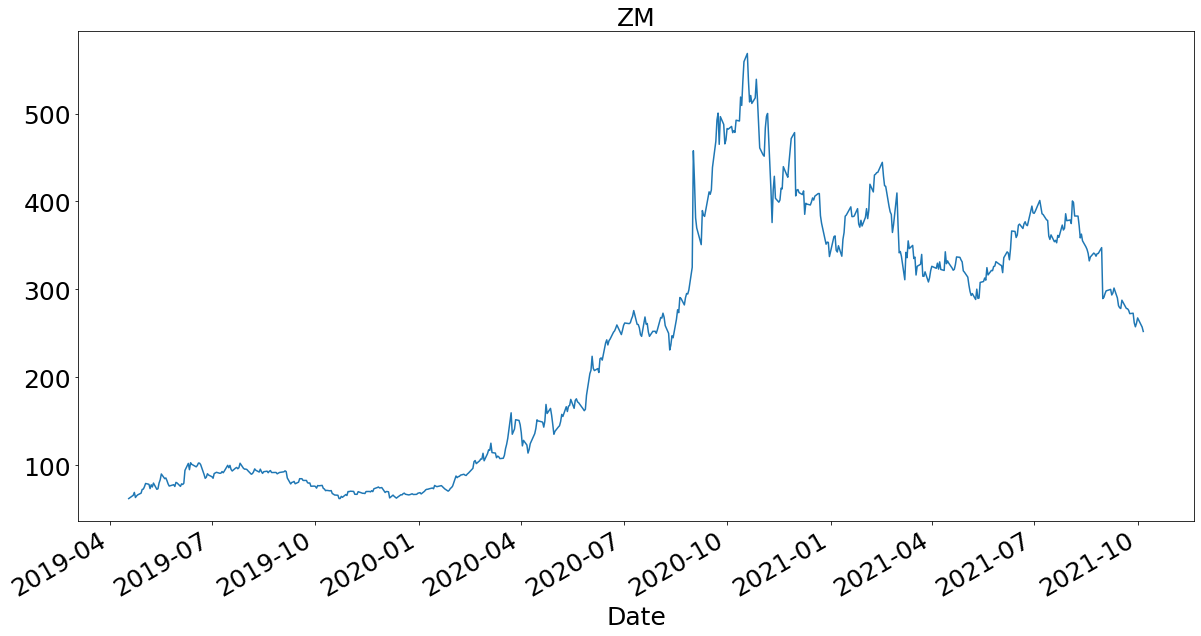

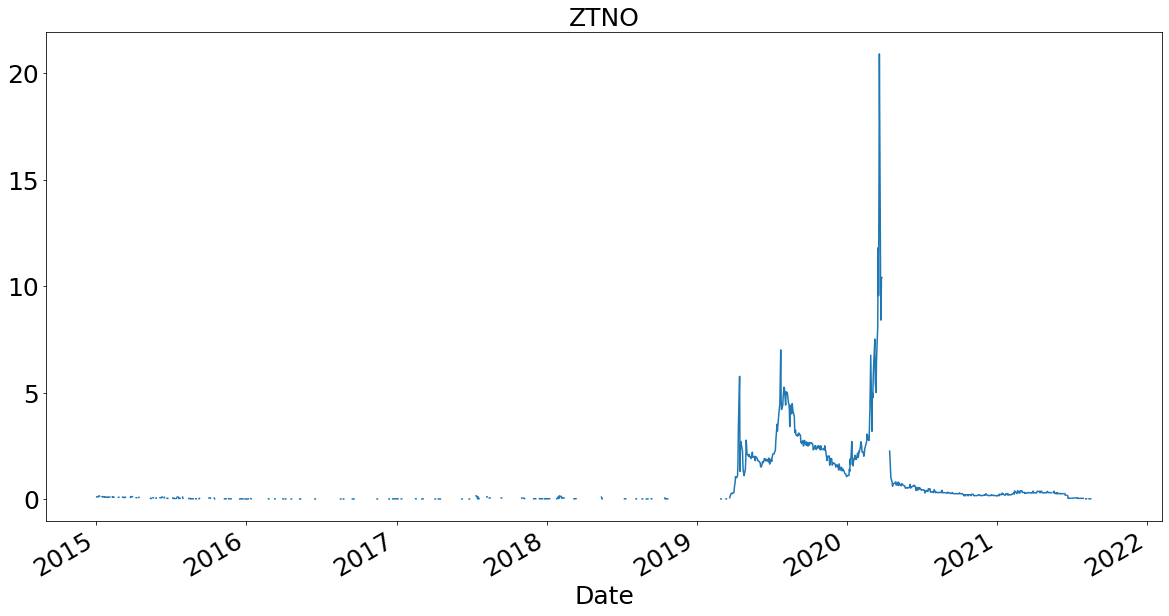

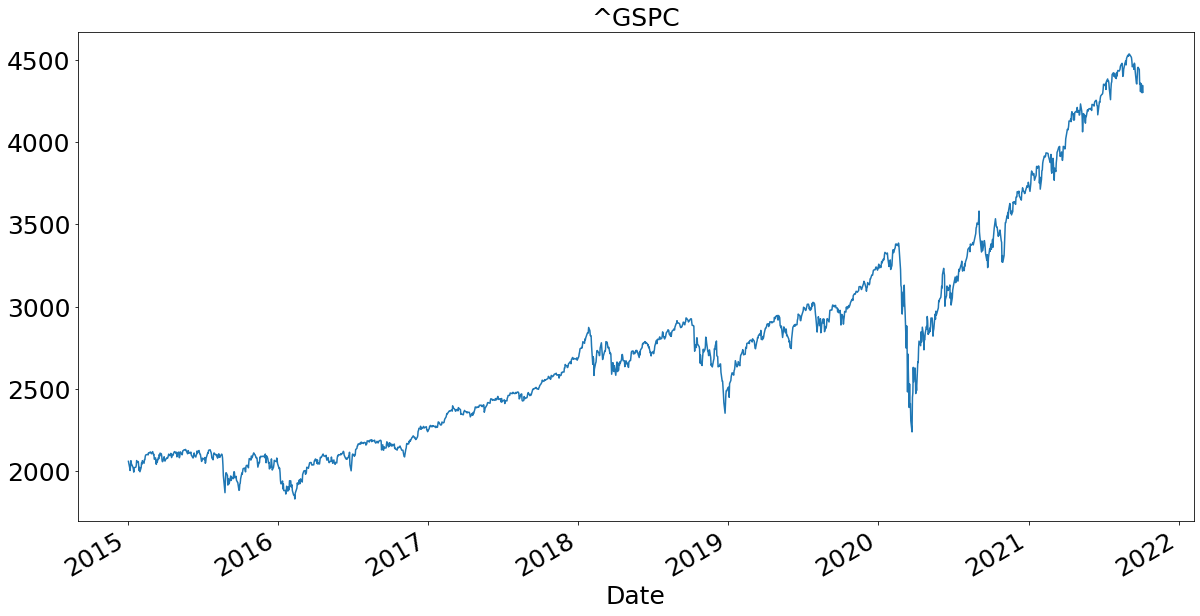

In [5]:
import yfinance as yf

stock_dict = {"^GSPC":"",
             "ZM":"",
             "ZTNO":"",
             "TSLA":"",
             "BX":"",
             }
stock_lst = list(stock_dict)
stock_df = yf.download(stock_lst, start = "2015-01-01")["Adj Close"]

plt.rcParams['font.size'] = 25
for key in stock_df: 
    fig, ax = plt.subplots(figsize = (20,10))
    stock_df[key].plot.line(color = "C0", ax = ax)
    plt.title(key, fontsize = 25,)
    plt.show()
    plt.close()

In [6]:
for key in stock_df:
    stock_df[key+" Daily Returns"] = stock_df[key].pct_change()
stock_df

,BX,TSLA,ZM,ZTNO,^GSPC,BX Daily Returns,TSLA Daily Returns,ZM Daily Returns,ZTNO Daily Returns,^GSPC Daily Returns
Date,,,,,,,,,,
2015-01-02,23.090212,43.862000,NaN,0.1000,2058.199951,NaN,NaN,NaN,NaN,NaN
2015-01-05,22.751940,42.018002,NaN,0.1000,2020.579956,-0.014650,-0.042041,NaN,0.00,-0.018278
2015-01-06,22.312189,42.256001,NaN,0.1000,2002.609985,-0.019328,0.005664,NaN,0.00,-0.008893
2015-01-07,22.630165,42.189999,NaN,0.1500,2025.900024,0.014251,-0.001562,NaN,0.50,0.011630
2015-01-08,22.806059,42.124001,NaN,0.1350,2062.139893,0.007773,-0.001564,NaN,-0.10,0.017888
...,...,...,...,...,...,...,...,...,...,...
2021-09-30,116.339996,775.479980,261.500000,NaN,4307.540039,-0.021695,-0.007462,0.015889,0.00,-0.011910
2021-10-01,115.750000,775.219971,267.510010,NaN,4357.040039,-0.005071,-0.000335,0.022983,0.00,0.011491
2021-10-04,110.949997,781.530029,259.579987,NaN,4300.459961,-0.041469,0.008140,-0.029644,0.00,-0.012986


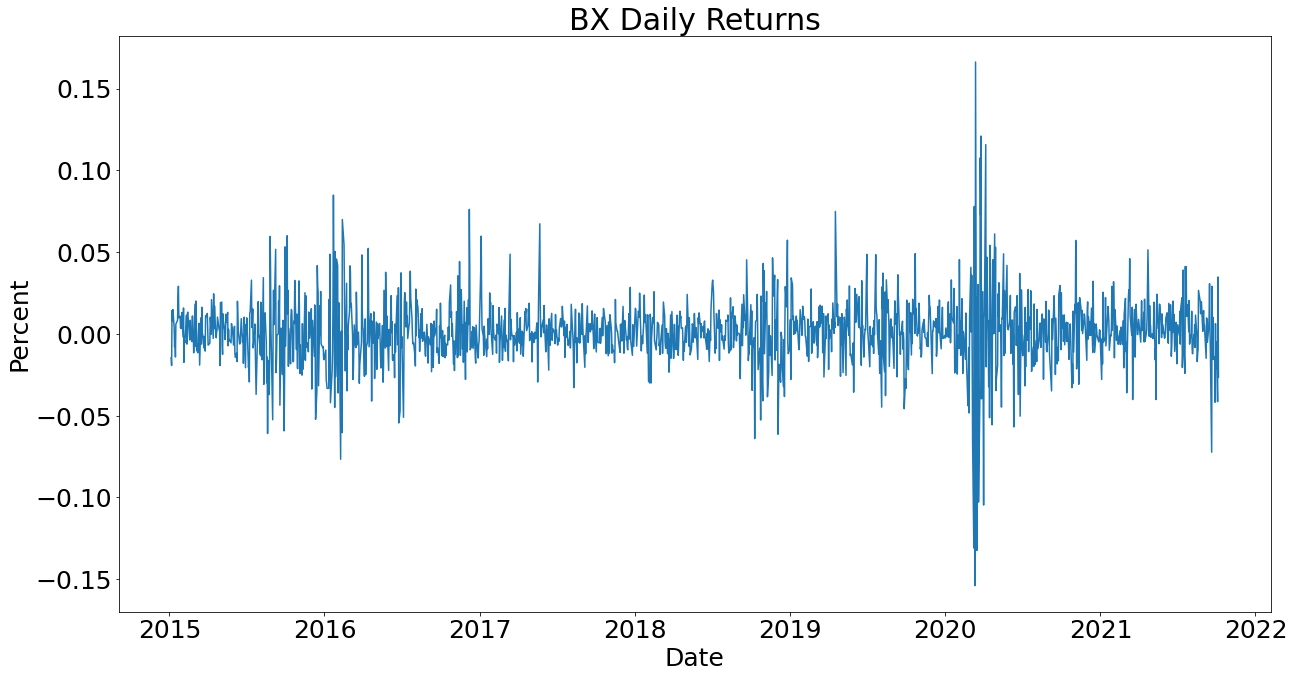

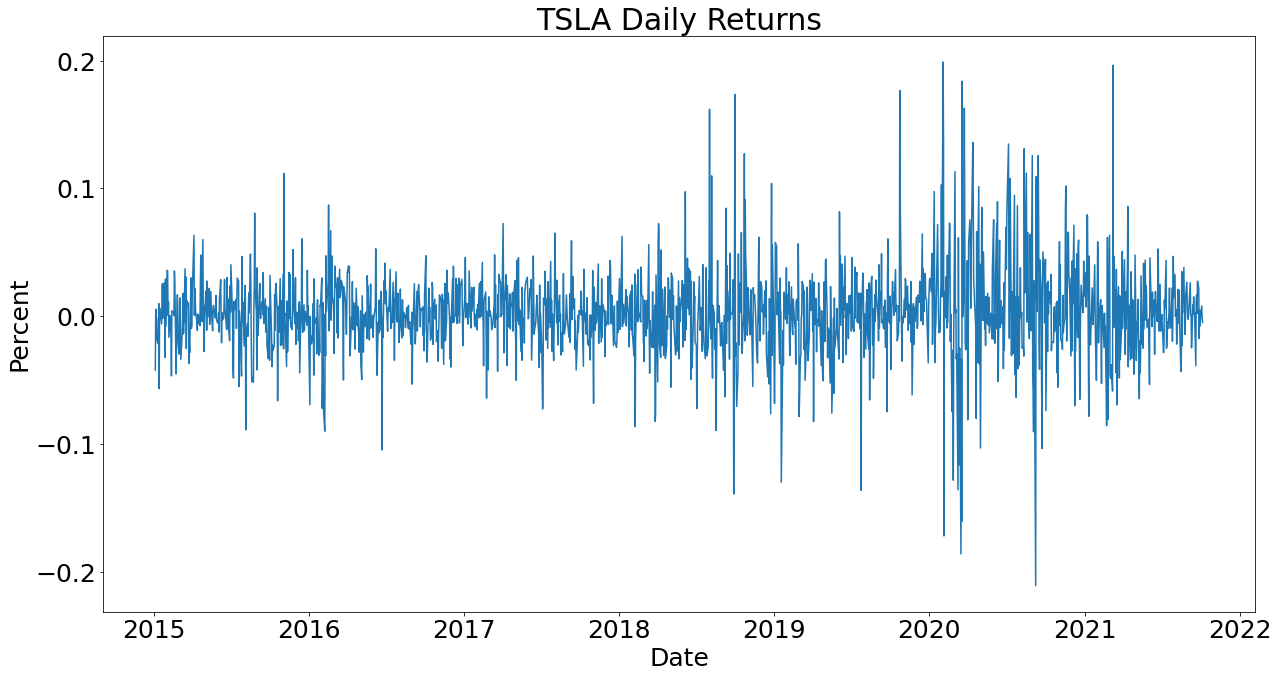

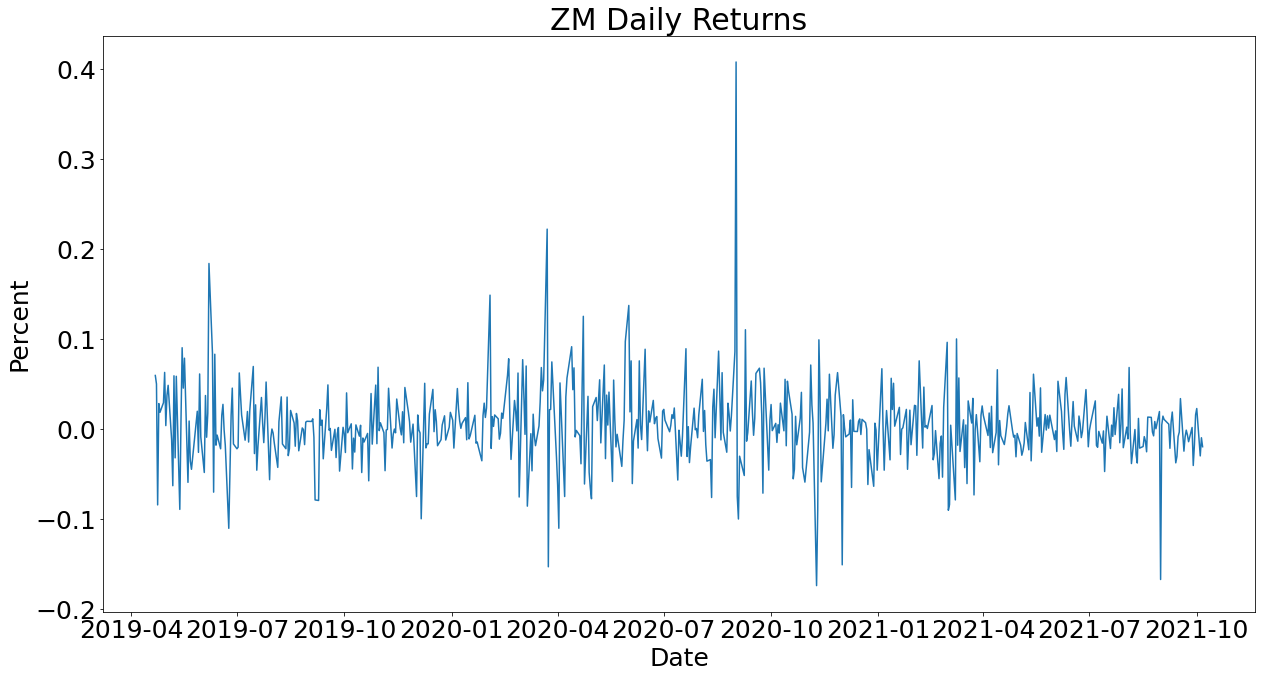

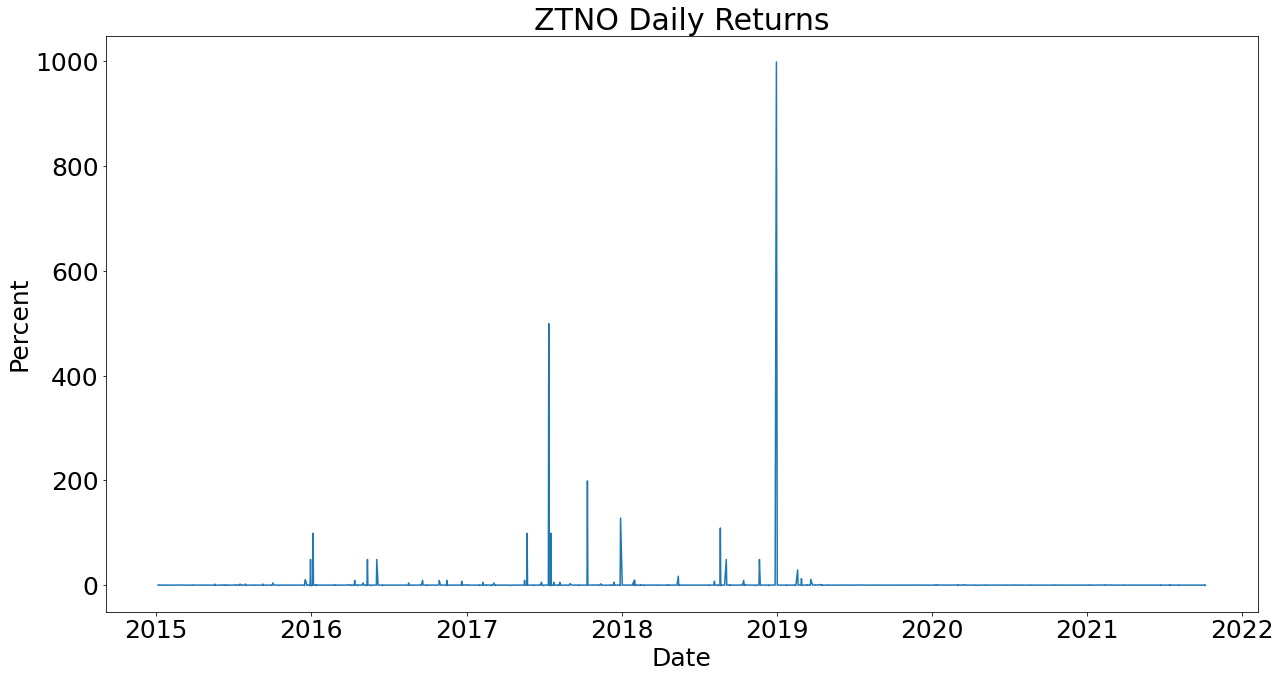

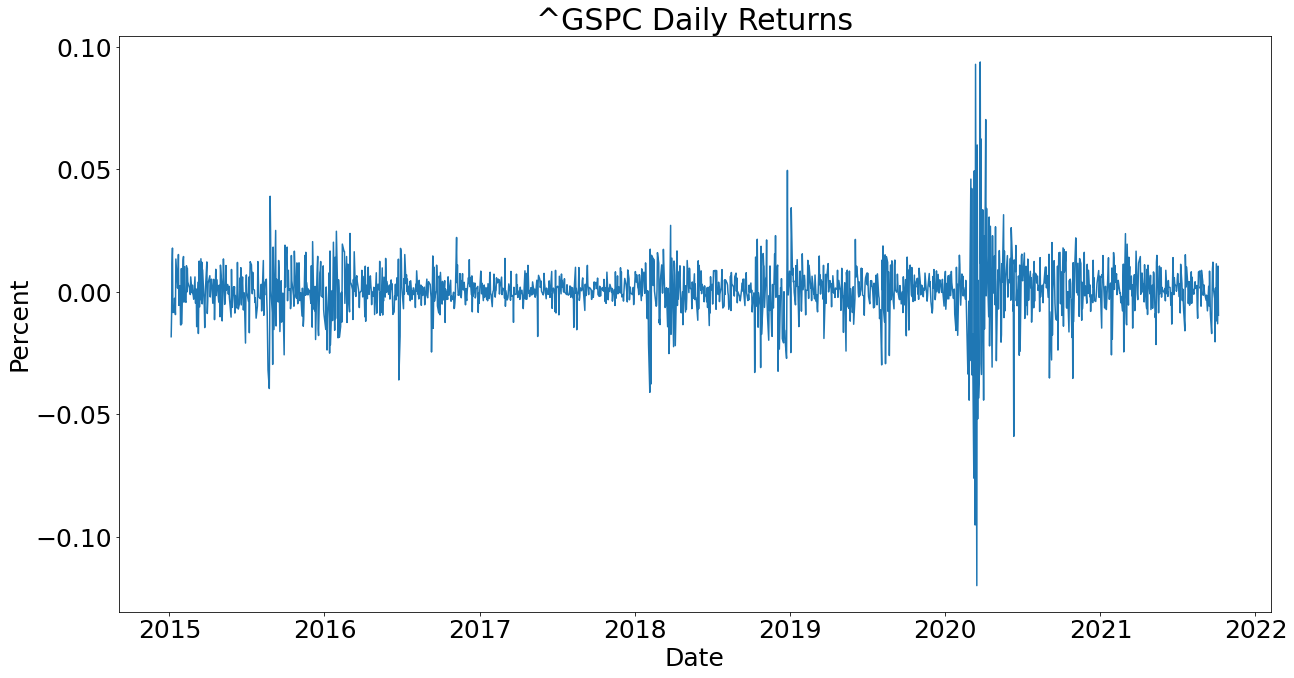

In [7]:
daily_returns_lst = [stock_df["BX Daily Returns"],stock_df["TSLA Daily Returns"],stock_df["ZM Daily Returns"],stock_df["ZTNO Daily Returns"],stock_df["^GSPC Daily Returns"]]
daily_returns_df = pd.DataFrame(daily_returns_lst).T

for key in daily_returns_df:
    fig = plt.figure(figsize = (20,10))
    ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
    ax1.plot(stock_df[key])
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Percent")
    ax1.set_title(key)
    plt.show()

# Financials 

I will need to pull financial data because the major valuators of the stock market is determined by earnings growth, GDP growth, earnings as a percent of GDP, and multiples growth. These factors aren't all of the valuation tools used my the market but these factors are major indicators of value. 

I download financial statements from Ycharts and then add that data as a CSV file into my code. I can create vizualizations from this data that I can overlay with other macro event and company specific events.

In [8]:
tsla_inc_stat  = pd.read_csv("/Users/jacobradke/Documents/GitHub/jacobradke/Homework Projects/tsla_inc_stat.csv")
tsla_inc_stat

,Date,TotalRevenue,CostOfRevenue,GrossProfit,OperatingExpense,SellingGeneralAndAdministration,ResearchAndDevelopment,OperatingIncome,NetNonOperatingInterestIncomeExpense,InterestIncomeNonOperating,...,NetIncome,BasicEPS,DilutedEPS,BasicAverageShares,DilutedAverageShares,TotalExpenses,InterestIncome,InterestExpense,NetInterestIncome,EBIT
0,12/31/08,14162000,15864000,-1702000,21522000,9696000,11826000,-23224000,-1056000,43000,...,-25498000,0.00,0.00,0,0,37386000,43000,1099000,-1056000,-24375000
1,3/31/09,20886000,22932000,-2046000,14548000,6607000,7941000,-16594000,-1386000,16000,...,-16016000,-0.04,-0.04,389869155,389869155,37480000,16000,1402000,-1386000,-14606000
2,6/30/09,26945000,24844000,2101000,10188000,8247000,1941000,-8087000,-1057000,29000,...,-10867000,-0.03,-0.03,389869155,389869155,35032000,29000,1086000,-1057000,-9773000
3,9/30/09,45527000,37828000,7699000,11990000,10733000,1257000,-4291000,34000,52000,...,-4615000,-0.01,-0.01,389869155,389869155,49818000,52000,18000,34000,-4816000
4,12/31/09,18585000,16804000,1781000,24706000,16563000,8143000,-22925000,37000,62000,...,-24242000,0.00,0.00,0,0,41510000,62000,25000,37000,-23988000
5,3/31/10,20812000,16960000,3852000,29850000,16585000,13265000,-25998000,-182000,48000,...,-29519000,-0.07,-0.07,389869155,389869155,46810000,48000,230000,-182000,-29171000
6,6/30/10,28405000,22144000,6261000,37623000,22207000,15416000,-31362000,-417000,47000,...,-38517000,-1.01,-1.01,38217325,38217325,59767000,47000,464000,-417000,-38044000
7,9/30/10,31241000,21945000,9296000,47130000,20432000,26698000,-37834000,-198000,100000,...,-34935000,-0.08,-0.08,461353605,461353605,69075000,100000,298000,-198000,-34554000
8,12/31/10,36286000,24965000,11321000,62966000,25349000,37617000,-51645000,63000,63000,...,-51358000,0.00,0.00,0,0,87931000,63000,0,63000,-51395000
9,3/31/11,49030000,31002000,18028000,65374000,24212000,41162000,-47346000,40000,40000,...,-48941000,-0.10,-0.10,475936725,475936725,96376000,40000,0,40000,-48791000


In [9]:
tsla_inc_stat["GrossMargin"] = (tsla_inc_stat["GrossProfit"]/tsla_inc_stat["TotalRevenue"]) * 100
tsla_inc_stat["Log R&D"] = np.log(tsla_inc_stat["ResearchAndDevelopment"])

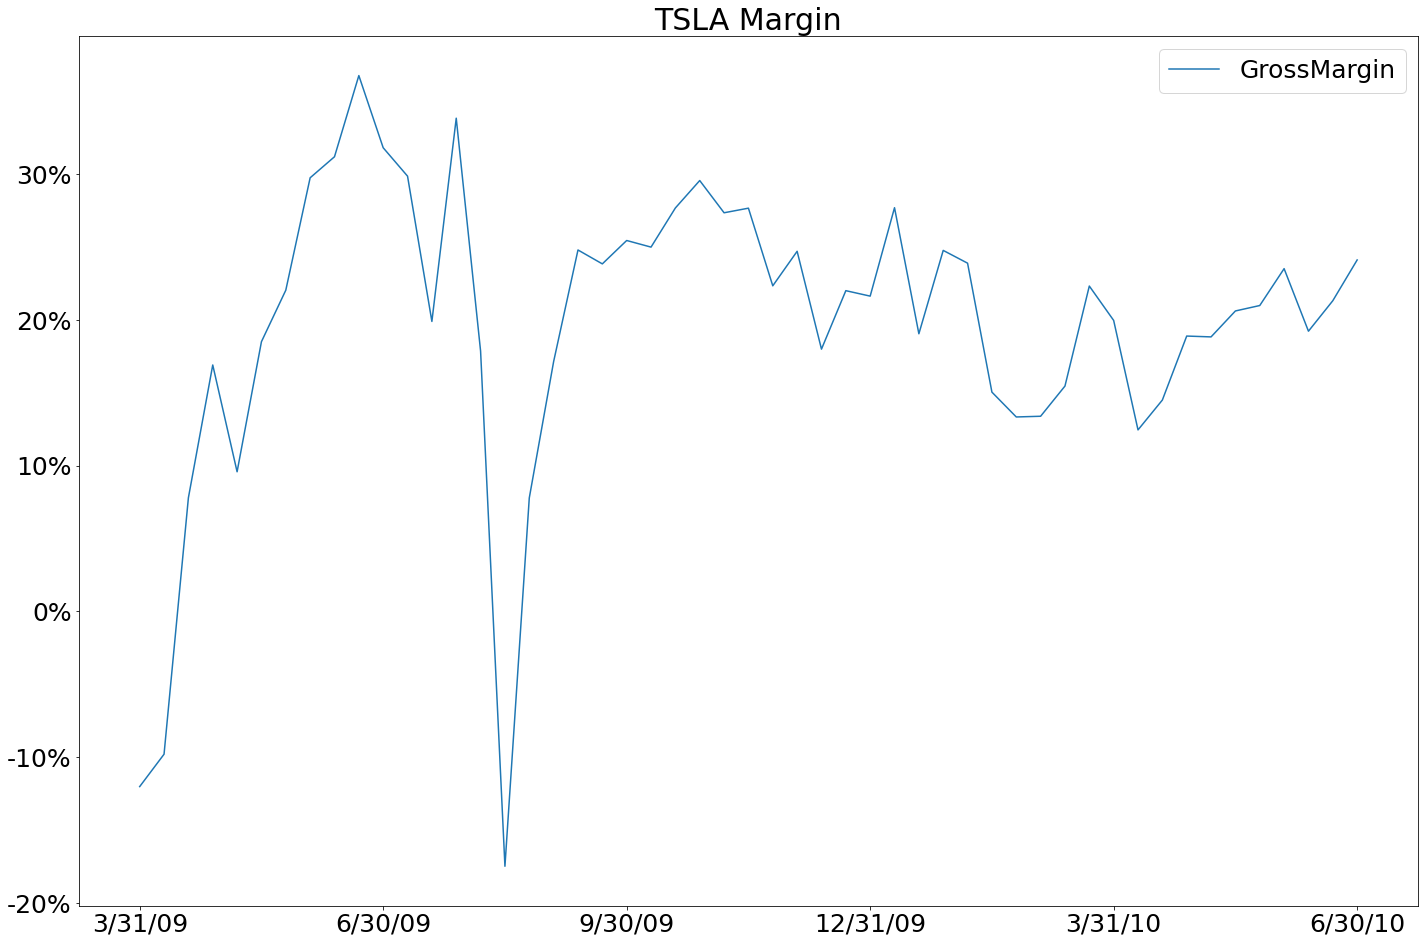

In [10]:
plt.rcParams.update({"font.size": 25})
fig, ax = plt.subplots(figsize = (24,16))
tsla_inc_stat["GrossMargin"].plot.line(ax = ax, legend = True)

x_vals = ax.get_xticks()
ax.set_xticklabels(tsla_inc_stat["Date"])
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])

plt.title("TSLA Margin")
plt.show()
plt.close();

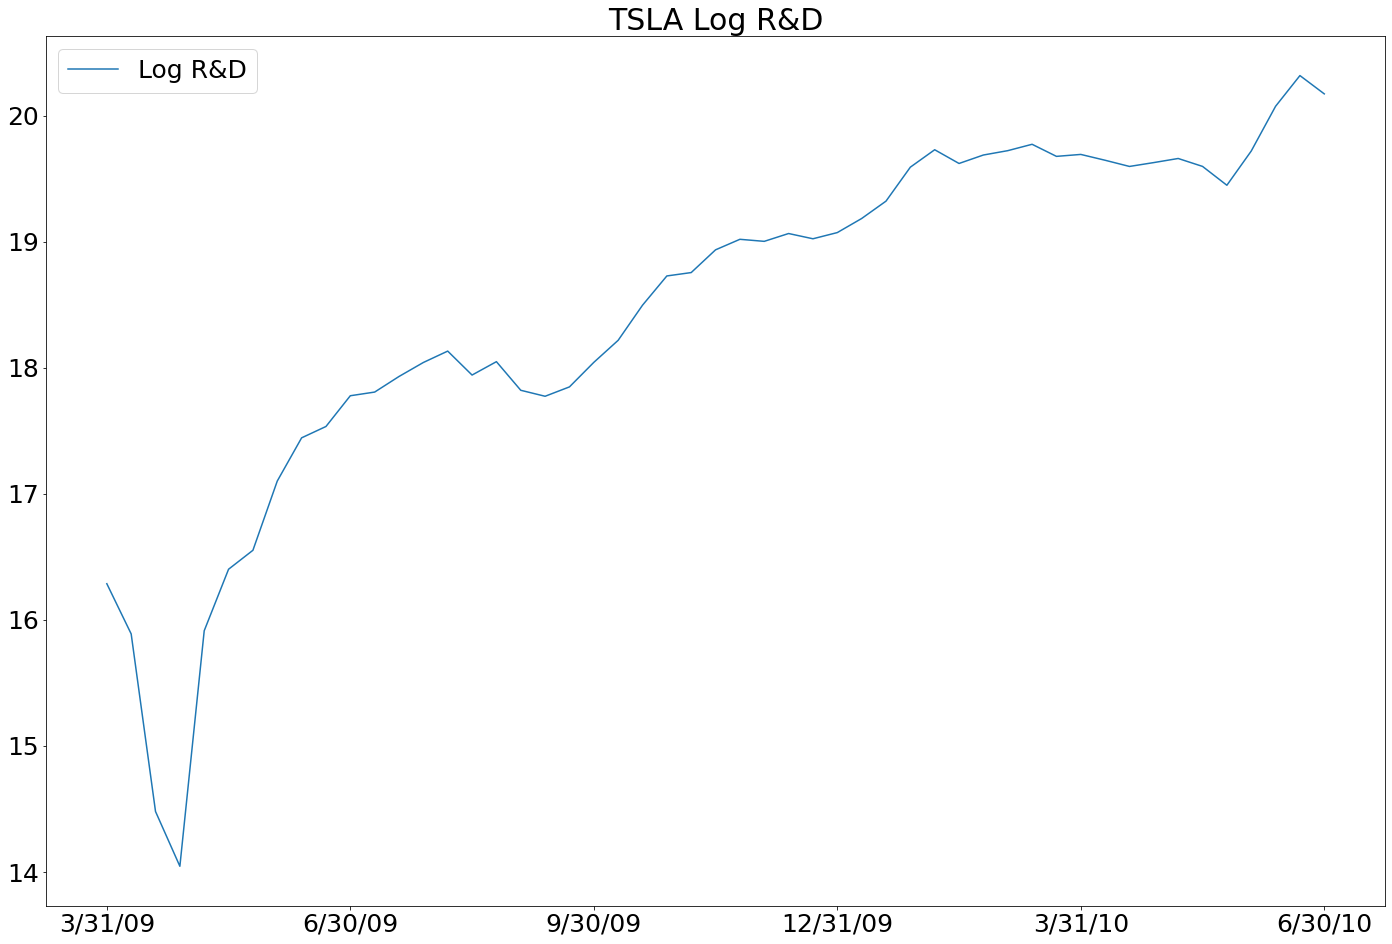

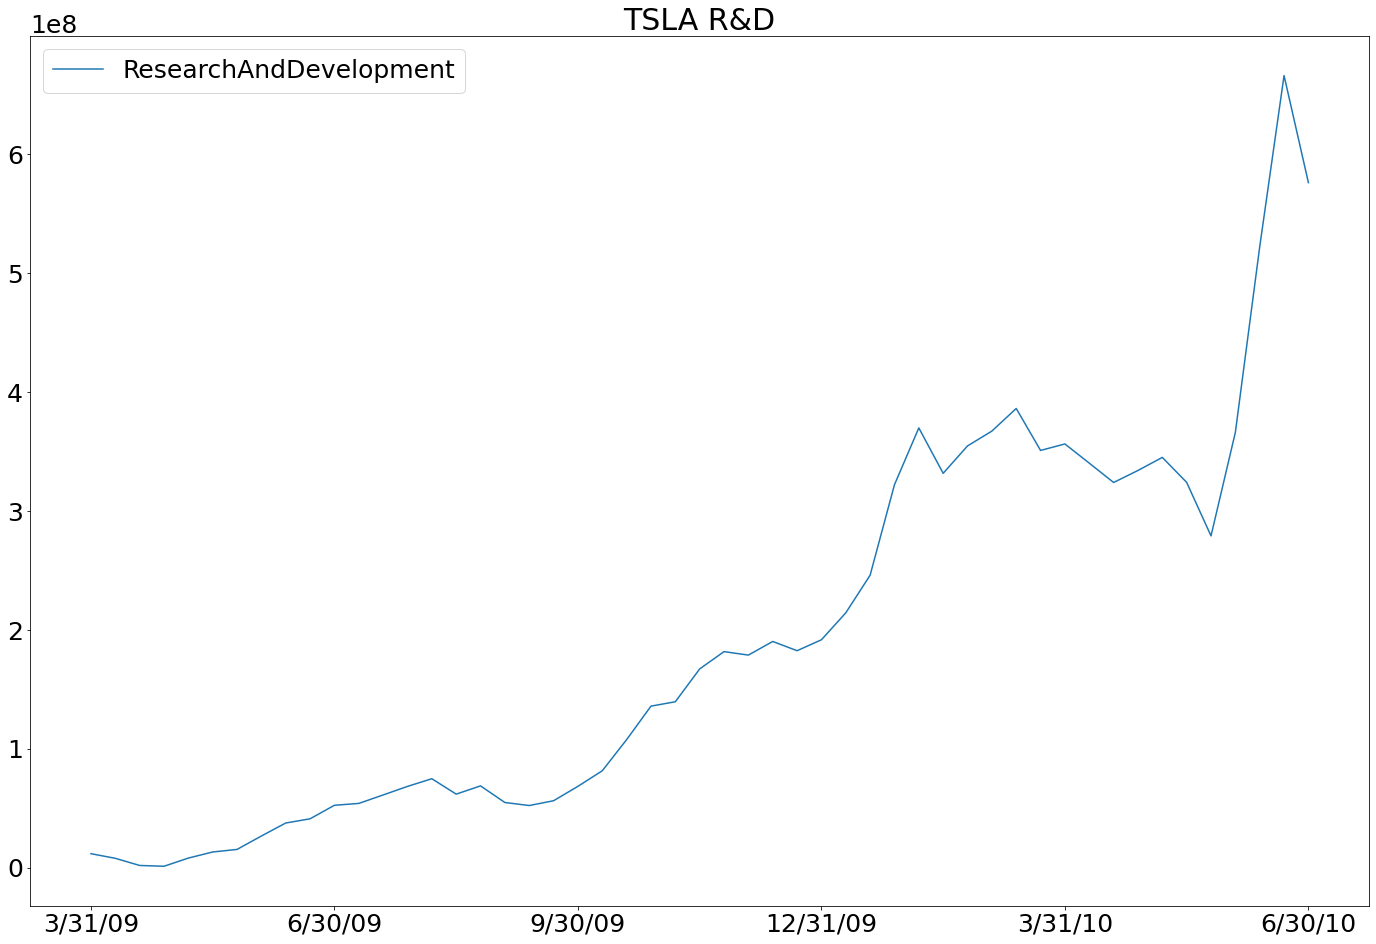

In [11]:
plt.rcParams.update({"font.size": 25})
fig, ax = plt.subplots(figsize = (24,16))
tsla_inc_stat["Log R&D"].plot.line(ax = ax, legend = True)

x_vals = ax.get_xticks()
ax.set_xticklabels(tsla_inc_stat["Date"])

plt.title("TSLA Log R&D")

plt.rcParams.update({"font.size": 25})
fig, ax = plt.subplots(figsize = (24,16))
tsla_inc_stat["ResearchAndDevelopment"].plot.line(ax = ax, legend = True)

x_vals = ax.get_xticks()
ax.set_xticklabels(tsla_inc_stat["Date"])

plt.title("TSLA R&D")
plt.show()
plt.close();

# Using fundamentals to describe the business process and better understand about the value that can come from that

This would look at their ROIC, to account for managements ability to excute on their business plans and invest their cash well. This will also look at key new developments within the firm. This metric will purely rely on fundamental analysis of the firm and the reports and news that comes out of these firms.  

I used Ycharts to download the ROIC data for ZM below: 

In [12]:
zm_roic = pd.read_csv("/Users/jacobradke/Documents/GitHub/jacobradke/Project/zm_return_on_invested_capital_data.csv")
zm_roic

,Period,Return on Invested Capital
0,7/31/19,2.3645
1,10/31/19,2.6068
2,1/31/20,3.9083
3,4/30/20,6.3156
4,7/31/20,25.9076
5,10/31/20,41.0082
6,1/31/21,40.5250
7,4/30/21,37.4456
8,7/31/21,32.5720


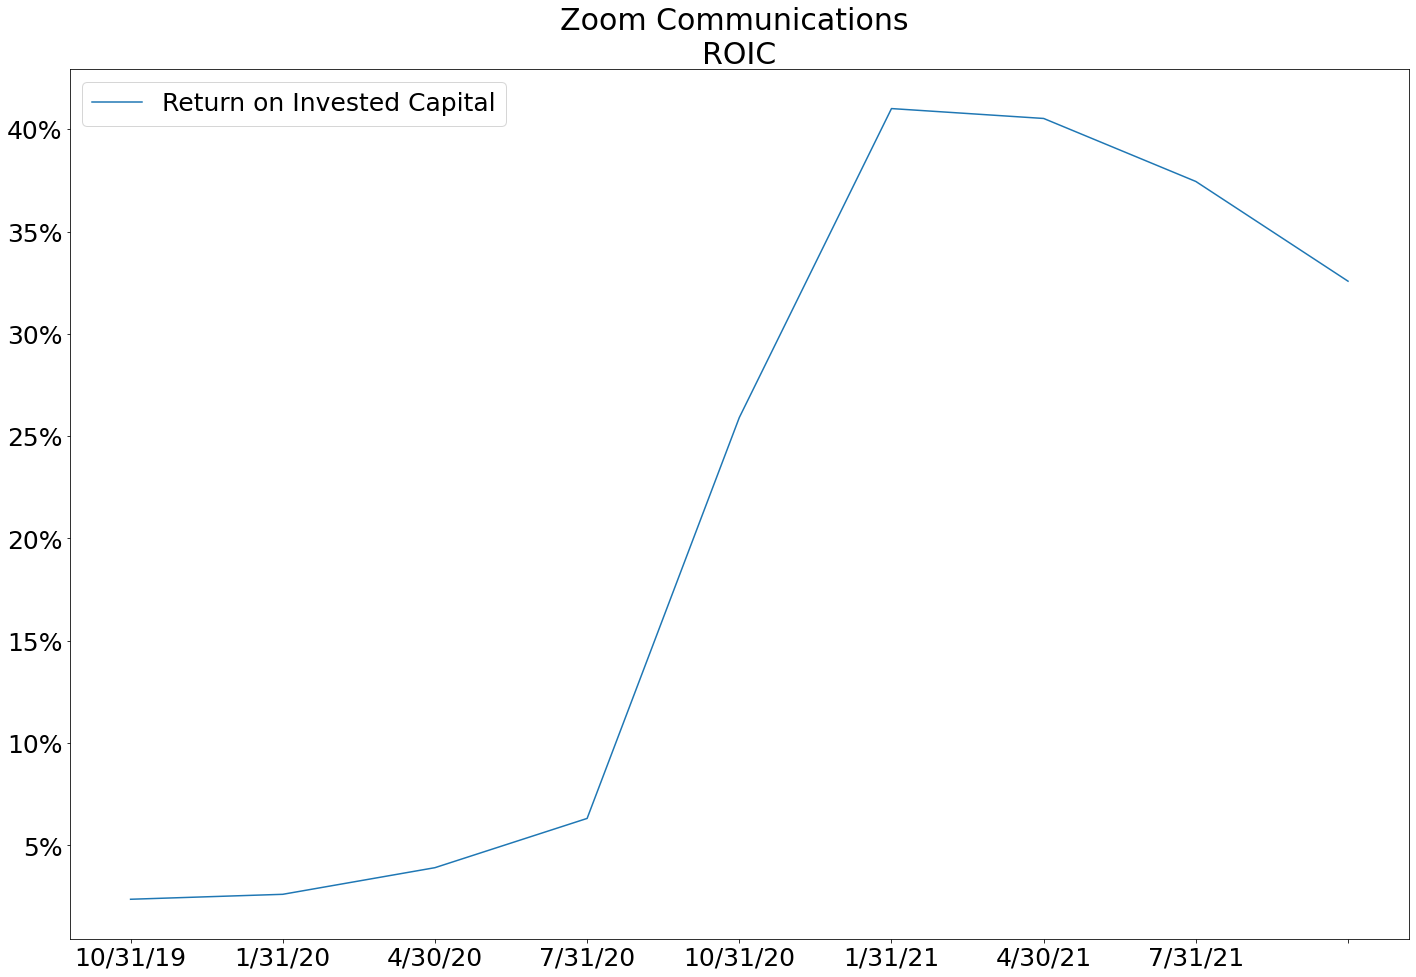

In [13]:
plt.rcParams.update({"font.size": 25})
fig, ax = plt.subplots(figsize = (24,16))
zm_roic.plot.line(ax = ax, legend = True)

x_vals = ax.get_xticks()
ax.set_xticklabels(zm_roic["Period"])
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])

plt.title("Zoom Communications \nROIC")
plt.show()
plt.close();

# Conclusion 

For my project using all of this data, and more as I complete this project, I will understand how the market either is efficient at pricing securities in real time or if their is mispricings in the market. 